##  Lebesgue's Proof of the Weierstrass Approximation Theorem


<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

You will get a much better rendering of this notebook by using nbviewer at jupyter.org.  Just click the link below

https://nbviewer.jupyter.org/github/macd/dbm_notebooks/blob/master/Lebesgue_Weierstrass.ipynb

### Lebesgue uses ReLU's to Prove the Fundamental Theorem of Approximation Theory

The Weierstrass Approximation Theorem, which is also known as the Fundamental Theorem of Approximation theory, says that if a function $f(x)$ is continuous on a closed interval [a, b] where  $-\infty < a < b < \infty$, and given any $\epsilon > 0 $, then there exits an algebraic polynomial p for which

$$ \left|f(x) - p(x)\right| < \epsilon \tag{1} $$

for all $x \in [a, b]$

We commonly say that $f(x)$ can be represented as a power series in $x$ if $f(x)$ is continuous on [a, b].

To prove this assertion, we will follow the development given in [1] but add more commentary.

We start at the beginning with the definition of a continuous function. A function is continuous at a point **a** if for each given $\epsilon > 0$ there is a $\delta > 0$ such that if 

$$\left| x - a \right| < \delta \tag{2}$$

then

<center>$ \left|f(x) - f(a)\right| < \epsilon$

That is, if $x$ is in a $\delta$ neighborhood of **a** then $f(x)$ is in a $\epsilon$ neighborhood of $f(a)$.  

One implication of $f(x)$ being continuous is that if it is continuous on a closed interval, then we can find a piecewise linear function that approximates well (to within $\epsilon$) $f(x)$.  This follows because the maximum difference in a linear function (to itself) must occur between the endpoints, so that once we have a set of points (depending on the choice of $\epsilon$) for which the continuity conditions hold, we also have $\left|g(x) - g(a)\right| < \epsilon$ whenever $\left|x - a\right| < \delta$ where we used $g(x)$ as the piecewise linear approximation to $f(x)$.

It turns out, of course, that we implicity use this fact any time we plot a continuous function.  We define a grid on which to evaluate the function and pass the grid and the function values to the plotting routine.

To illustrate this, we plot a function on two different grids, one representing the "continuous" function and the other to represent a piece-wise linear approximation



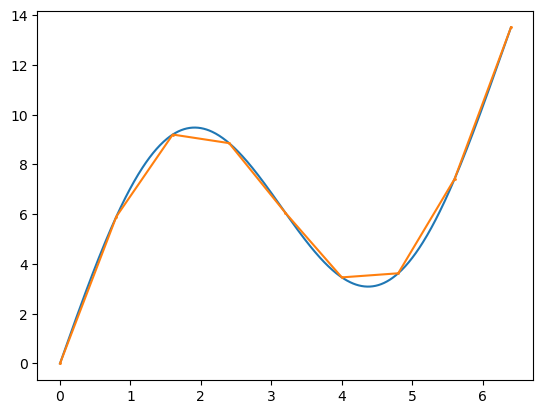

In [1]:
using SpecialFunctions
using PyPlot

f(x) = 6sin.(x) + 2x

# This is the 'continuous function' range
c_range = 0.0:0.01:6.4
y = f(c_range)

plot(c_range, y)

# This is the piece-wise linear range
pl_range = 0.0:0.8:6.4
yd = f(pl_range)
plot(pl_range, yd, ".-", markersize=2);

So now, in order to prove a polynomial approximation to the original $f(x)$, we only need to find a polynomial approximation to the piece-wise linear function $g(x)$.

One way to write the function $g(x)$ is the following:

$$  g(x) = g_{1}(x) + \sum_{i=1}^{m-1}[g_{i+1}(x) - g_{i}(x)]h(x -x_{i}) \tag{3}$$

where $g_{i}(x)$ is the linear polynomial agreeing with g on $[x_{i-1}, x_{i}]$ and

$$
h(x) = 
   \begin{cases}
             1, & \text{when $x\geq 0$} \\
             0, & \text{when $x\lt 0$}
   \end{cases} \tag{4}
$$

that is, $h(x)$ is the Heaviside step function, sometimes also called a binary step unit.

Each $g_{i}(x)$ can be written as

$$  g_{i} = y_{i-1} + (x - x_{i-1}) \left(\frac{y_{i} - y_{i-1}}{x_{i} - x_{i-1}}\right) \tag{5}$$   

Here we have a given set of $x_{i}$ where $y_{i} = y(x_{i})$. That is, the set of tuples ($x_{i}, y_{i}$) are the points used for the piecewise linear approximation and our approximation just connects the dots.

We can understand Eqn (3) in the following way.  As long as $x$ is less than $x_{i}$, none of the linear sections $g_{j}(x)$ with j > i contribute to $g(x)$ because of the step function.  When $x$ becomes greater than $x_{i}$, the new section 'kicks in' and also subtracts out the linear section just before it so that only one linear section is active for any value of $x$.

A different, but analogous, way to is to take the approach the Lebesgue did and the approximating piecewise linear polynomial $g(x)$ as the following (of course, Lebesgue did not use the term **ReLU**)

$$g(x) = ax + b + \sum_{i=1}^{m-1} c_{i} ReLU(x - x_{i}) \tag{6}$$

where

$$
ReLU(x) = 
   \begin{cases}
             x, & \text{when $x\geq 0$} \\
             0, & \text{when $x\lt 0$}
   \end{cases} \tag{7}
$$

We see that Eqn (6) as a sum of ReLUs, as each one becomes 'active' it essentially subtracts out the previous linear contributions while adding in the single new linear function for that segment in much the same way as Eqn. 3. 

Equation (6) is very close to the neural net univeral approximation theorem (at least for a single variable), but we'll put that aside for a moment to finish the proof of the Weierstrass Approximation Theorem.

Since we can write

$$2 ReLU(x) = \left|x\right| + x$$

we can absorb constants and rearrange to finally arrive at

$$g(x) = Ax + B + \sum_{i=1}^{m-1} C_{i} \left|x - x_{i}\right| \tag{9}$$

This shows that in order to approximate $g(x)$ (and hence $f(x)$) by a polynomial, we need to find a polynomial approximation **only** to $\left|x\right|$  for if we have that, then the following must be true for some $\eta \gt 0$

$$\left|\left|x\right| - p(x)\right| < \eta$$

for all $x \in [-1, 1]$, which naturally means that

$$\left|\left|x - x_{i}\right| - p(x - x_{i})\right| < \eta$$

By a "judicious" choice of $\eta$ depending on the constants $C_{i}$ in Eqn (8) it follows that

$$\left|g(x) - \left[Ax + B + \sum_{i=1}^{m-1} C_{i} p\left(x - x_{i}\right)\right]\right| \lt \epsilon \tag{10}$$

So now we only need to find a polynomial approximation for |x|.  Easy, yes?  Starting with one definition of |x| and developing further

$$ |x| = \sqrt{x^2} = \sqrt{1 - (1 - x^2)}$$

We now use the binomial theorem to expand into a power series in $(1 - x^2)$ which converges uniformly to |x| in [-1, 1].

$$ |x| = \sum_{{n=0}}^{\infty} {1/2 \choose n} (x^{2} - 1)^{n} \tag{11}$$

and we're done.  But just how good is this approximation to |x|?  Let's take a look.

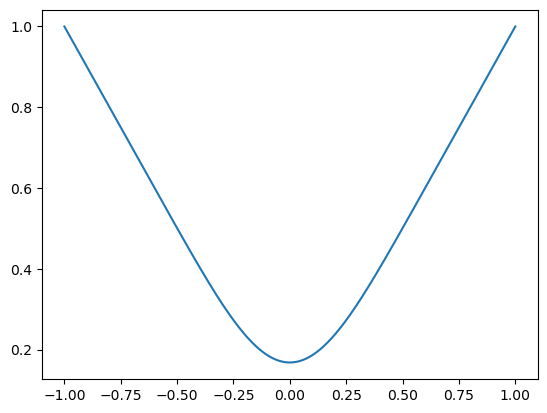

0.16818994886441943
1.0


In [2]:
# Large binomial in floating point by logs.  This will throw an error if y 
# cannot be converted to an integer
function lbinom(x, y)
    typeof(x) <: Integer || y == zero(y) || Int(y) % 2 == 1 ? sg = 1.0 : sg = -1.0
    a = lgamma(x + 1) - (lgamma(x - y + 1) + lgamma(y + 1))
    return sg * exp(a)
end

# precalculate a bunch of binomial coefficients of the form binom_half(0.5, n)
max_order = 100000
bc = lbinom.(0.5, 0:max_order)

function abs_binom(x, bc)
    t = 0.0
    xj = 1.0
    xm = x^2 - 1.0
    for j in 1:length(bc)
        t += bc[j] * xj
        xj *= xm
    end
    return t
end


pts = 1000
xx = range(-1, 1, length=pts)
yy = zeros(pts)

function plot_order!(bc, xx, yy)
    i = 1
    for x in xx
        yy[i] = abs_binom(x, bc)
        i += 1
    end
    println(minimum(yy))
    println(maximum(yy))
    plot(xx, yy)
end

plot_order!(bc[1:12], xx, yy);

Well, it kind of looks like $|x|$ but the value at zero is still pretty far off at 0.168.  Let's try harder.

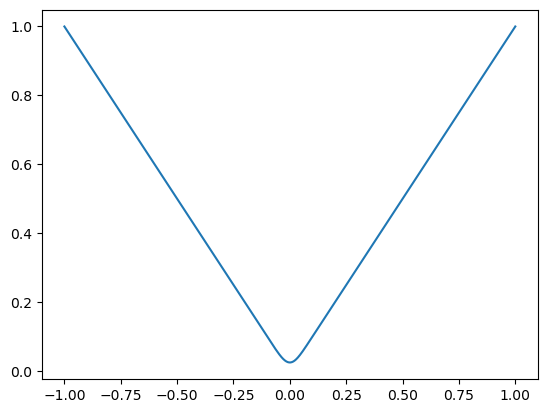

0.02526289251850118
1.0


In [3]:
plot_order!(bc[1:500], xx, yy);

Better, but still not great.  Going very high in the expansion now

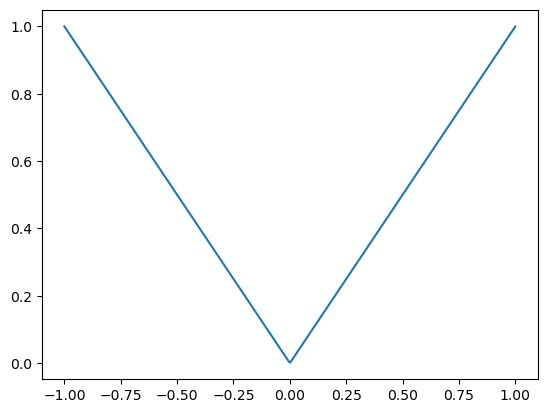

0.0019599728475132223
1.0


In [4]:
plot_order!(bc[1:100000], xx, yy);

OK, it converges very slowly and that's because there is a discontinuous first derivative which tells us that we can only get linear convergence.  That's OK, it still proves the fundamental approximation theorem.  For a better expansion for |x| take a look at [Chebfun](http://www2.maths.ox.ac.uk/chebfun/) where we can get ~1e-5 accuracy for a 1000 term expansion, which is much better than what we see here.

This actually illustrates a very good point, and that is even if we know that a good polynomial approximation to a function exists, the approximation theorem tells us nothing about how to find it.

Also want to note quickly here that we could have just as easily proved the theorem by finding a polynomial expansion to $h(x)$ instead of $ReLU(x)$.  But this shows how $h(x)$ can also be used as an activation function in a neural net.

**References**

[1] A. Pincus, 'Weierstrass and Approximation Theory", http://www.math.technion.ac.il/hat/fpapers/wap.pdf 

[2] J.P. Berrut and L.N. Trefethen, 'Barcentric Lagrange Interpolation', SIAM Review, Vol. 46, No. 3 (Sept. 2004) pp. 501-517

[3] http://www2.maths.ox.ac.uk/chebfun/

[4] Lloyd N. Trefethen, "Approximation Theory and Approximation Practice", SIAM, Philadelphia, 2013


## Appendix 1  Lebesgue's First Paper (on the Wiererstrass Approximation Theorem)

The following is a rough translation of Lebegue's first paper, which can be seen in the original French [here](http://www.math.technion.ac.il/hat/fpapers/LEB1.PDF)

In translating the paper, I used a combination of OCR, Google translate, asking relatives who know some French, and guesswork.  There are still things that do not make sense to me, but the high points are clear.  Lebegue used RELU's to prove the Weierstrass Approximation theorem.  He used its derivative, the Heaviside step function, to represent discontinuities, he did a case analysis on representing discontinuous functions, showed a development for functions of more than one variable and discussed the approximation in the context of Fourier series.

I kept the page numbering and content per page the same as in the original so that comparisions with the original will be easier.

In [5]:
using PyCall
@pyimport IPython.display as ipd
ipd.IFrame("./data/leb.pdf", 900, 500)

PyObject <IPython.lib.display.IFrame object at 0x7f3d5412d2b0>